# 🦘 Possum Ecology Analysis - Data Science Project

Welcome to the project! In this notebook, we analyze the morphometric data of brushtail possums to:

- Predict possum **age** (Linear Regression)
- Classify possum **sex** (Logistic Regression)
- Classify **trapping site** (KNN)

We'll use Python's standard data science libraries.

In [1]:
# 📥 Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

In [2]:
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


,0
case,0
site,0
Pop,0
sex,0
age,2
hdlngth,0
skullw,0
totlngth,0
taill,0
footlgth,1


In [4]:
# 🧹 Preprocessing
df['age'] = df['age'].fillna(df['age'].mean())
df['footlgth'] = df['footlgth'].fillna(df['footlgth'].mean())
df['sex'] = df['sex'].map({'m': 1, 'f': 0})
df = pd.get_dummies(df, columns=['Pop', 'site'], drop_first=True)

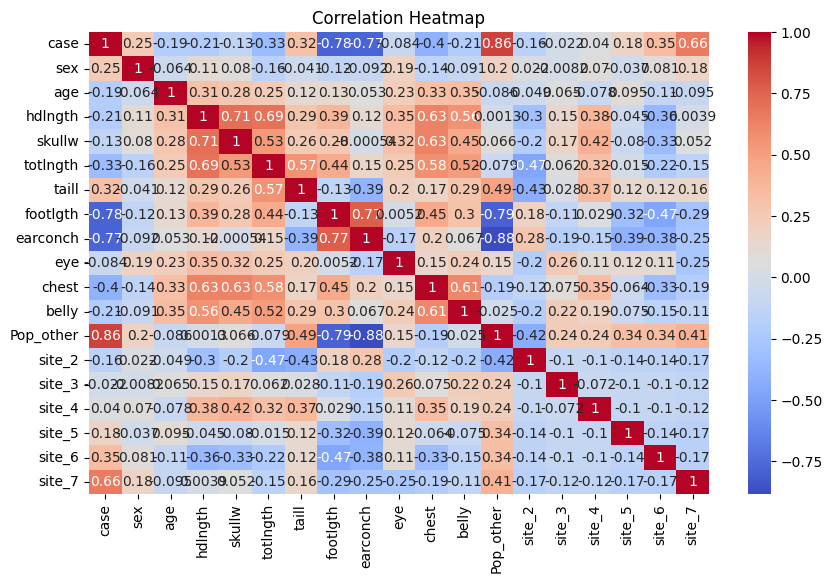

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# Linear Regression: Predict Age
X_age = df.drop(columns=['age', 'case'])
y_age = df['age']
X_train, X_test, y_train, y_test = train_test_split(X_age, y_age, test_size=0.2, random_state=42)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

RMSE: 2.2748737319839805
R²: -0.15113912573515065
MAE: 1.656139314152923


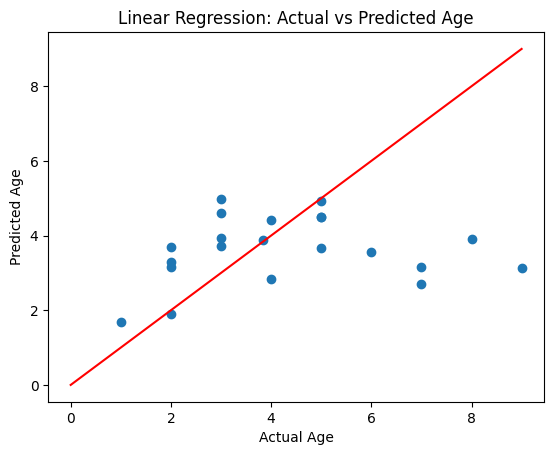

In [7]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Linear Regression: Actual vs Predicted Age")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.show()

In [8]:
# Logistic Regression: Classify Sex
X_sex = df.drop(columns=['sex', 'case'])
y_sex = df['sex']
scaler = StandardScaler()
X_sex_scaled = scaler.fit_transform(X_sex)
X_train, X_test, y_train, y_test = train_test_split(X_sex_scaled, y_sex, test_size=0.2, random_state=42)
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.6666666666666666
Precision: 0.6875
Recall: 0.8461538461538461
F1-score: 0.7586206896551724


In [9]:
# KNN Classification: Classify Sex
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_knn_pred))

KNN Accuracy: 0.5714285714285714


In [10]:
# KNN Regression: Predict Age (optional)
# KNN Regression: Predict Age (optional)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_knn_reg_pred = knn_reg.predict(X_test)

# Calculate RMSE manually
mse = mean_squared_error(y_test, y_knn_reg_pred)
rmse = mse ** 0.5
print("KNN RMSE:", rmse)


KNN RMSE: 0.48403069560278333


In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
# Naive Bayes Classification: Classify Sex
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_nb_pred = model_nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_nb_pred))
print("Naive Bayes Precision:", precision_score(y_test, y_nb_pred))
print("Naive Bayes Recall:", recall_score(y_test, y_nb_pred))
print("Naive Bayes F1-score:", f1_score(y_test, y_nb_pred))

Naive Bayes Accuracy: 0.6190476190476191
Naive Bayes Precision: 0.7272727272727273
Naive Bayes Recall: 0.6153846153846154
Naive Bayes F1-score: 0.6666666666666666


# 🎯 Project Summary and Achievements

Iss project mein, humne brushtail possum ke morphometric data ka analysis kiya aur nimnlikhit mukhy goals safaltapoorvak achieve kiye:

-   **Possum ki Age predict ki (Linear Regression):** Humne possum ki age predict karne ke liye Linear Regression model ka upyog kiya aur uske performance ka evaluation RMSE, R² aur MAE metrics ke dwara kiya.
-   **Possum ke Sex ko classify kiya (Logistic Regression, KNN, and Naive Bayes):** Humne possum ke sex ko classify karne ke liye teen alag-alag classification models ka upyog kiya: Logistic Regression, KNN, aur Naive Bayes. Har model ki accuracy, precision, recall, aur F1-score ka evaluation kiya gaya.
-   **Data Preprocessing:** Analysis se pehle, humne data ko clean aur prepare kiya, jismein missing values ko handle karna aur categorical variables ko encode karna shamil tha.
-   **Data Visualization:** Humne data ke beech correlations ko samajhne ke liye correlation heatmap jaise visualizations ka upyog kiya.

Yeh project data science pipeline ka ek comprehensive overview pradaan karta hai, jismein data loading, cleaning, preprocessing, model training, aur evaluation shamil hai.
